In [2]:
from IPython.display import Latex
from IPython.display import Math
from scipy.stats import bernoulli
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
redbox = {"rb1" : "apple", "rb2" : "apple", "rb3" : "orange", \
          "rb4" : "orange", "rb5" : "orange", "rb6" : "orange" , "rb7" : "orange", "rb8" : "orange"}

In [4]:
bluebox = {"bb1" : "apple", "bb2" : "apple", "bb3" : "apple", "bb4" : "orange"}

In [5]:
def pAppleGivenRed(redbox):
    '''returns the probability of getting a apple given the redbox'''
    
    apple = 0
    orange = 0
    for item in redbox:
        if redbox[item] == "apple":
            apple += 1
        else:
            orange += 1
    return float(apple)/len(redbox)

def pAppleGivenBlue(bluebox):
    '''returns the probability of getting an apple given the bluebox'''

    apple = 0
    orange = 0
    for item in bluebox:
        if bluebox[item] == "apple":
            apple += 1
        else:
            orange += 1
    return float(apple)/len(bluebox)

def chooseBox(N, probability_of_bluebox):
    '''uses the bernoulli distribution to obtain random samples where the probability of 1 is set 
    using the argument probability_of_bluebox.
    Using the results of the sampling returns the probability of the bluebox'''
    
    red = 0
    blue = 0
    for i in range(N):
        choose_box = bernoulli.rvs(probability_of_bluebox, size=1)
        if choose_box == 1:
            blue += 1;
        else:
            red += 1;
    
    return float(blue)/float(N)
    
def chooseFruit(N, bluebox, redbox, blueboxprior=0.6):
    '''deterimines and prints the probability of an apple or an orange, marginalizing out from which
    box the fruit was chosen from. The prior probability of boxes is set using blueboxprior'''
    
    redboxprior = 1.0 - blueboxprior
    orange = 0
    apple = 0
    blueboxfruitnumber = len(bluebox)
    redboxfruitnumber = len(redbox)
    blueboxfruitprob = 1.0/blueboxfruitnumber
    redboxfruitprob = 1.0/redboxfruitnumber
    
    for i in range(N):
        #randomnly choose the box using the prior probability for the bluebox
        box = bernoulli.rvs(blueboxprior, size=1)
        
        if box == 1:
            #blue box was chosen
            #using the multinomial (1 out of K) choose a piece of fruit
            #each piece of fruit has equal probability of being chosen
            choose_bluebox_fruit = np.random.multinomial(1, [blueboxfruitprob]*blueboxfruitnumber)
            
            for j in range(len(bluebox)):
                
                #determine what fruit was chosen
                if choose_bluebox_fruit[j] == 1:
                    fruit = bluebox[bluebox.keys()[j]]
                    if fruit == "apple":
                        apple += 1
                    else:
                        orange += 1
        else:
            #red box was chosen
            #using the multinomial (1 out of K) choose a piece of fruit
            #each piece of fruit has equal probability of being chosen
            choose_redbox_fruit = np.random.multinomial(1, [redboxfruitprob]*redboxfruitnumber)
            for j in range(len(redbox)):
                
                #determine what fruit was chosen
                if choose_redbox_fruit[j] == 1:
                    fruit = redbox[redbox.keys()[j]]
                    if fruit == "apple":
                        apple += 1
                    else:
                        orange += 1
                        
    #print out the probabilities of each fruit based upon the samplin
    print "Apple: ", float(apple)/float(N)
    print "Orange: ", float(orange)/float(N)

In [6]:
print pAppleGivenRed(redbox)
print pAppleGivenBlue(bluebox)

0.25
0.75


In [7]:
chooseBox(100000, 0.5)

0.50155

---
Questions:
===
***

1. Calculate, using the rules of probability, the probability of an Apple using a prior probability of choosing a blue box of 0.4, 0.5, and 0.6

2. Using the sampling routine chooseFruit confirm that a long run sample converges on your probabilities

In [8]:
N =  100000
blue_box_prior_prob = 0.5
chooseFruit(N, bluebox, redbox, blueboxprior = blue_box_prior_prob)

Apple:  0.49829
Orange:  0.50171


####Hint:

$$P(Apple) = P(Apple|bluebox) * P(bluebox) + P(Apple|redbox) * P(redbox)$$

In [9]:
P_BlueBox = 0.4
P_RedBox = 1 - P_BlueBox;

P_Apple_given_BlueBox = pAppleGivenBlue(bluebox)
P_Orange_given_BlueBox = 1 - P_Apple_given_BlueBox

P_Apple_given_RedBox = pAppleGivenRed(redbox)
P_Orange_given_RedBox = 1 - P_Apple_given_RedBox

P_Apple = P_Apple_given_BlueBox * P_BlueBox + P_Apple_given_RedBox * P_RedBox
P_Orange = P_Orange_given_BlueBox * P_BlueBox + P_Orange_given_RedBox * P_RedBox

print "P Blue box = ",P_BlueBox
print "P Red box = ",P_RedBox
print "\n"
print "P Apple given blue box = ",P_Apple_given_BlueBox
print "P Orange given blue box = ",P_Orange_given_BlueBox
print "\n"
print "P Apple given red box = ",P_Apple_given_RedBox
print "P Orange given red box = ",P_Orange_given_RedBox
print "\n"
print "P_Apple is", P_Apple
print "P_Orange is", P_Orange
print "\n"
P_BoxIsBlue_given_Apple = P_Apple_given_BlueBox * P_BlueBox / P_Apple
print "P(Box is blue|Fruit is an apple) = {:5.2f}".format(P_BoxIsBlue_given_Apple)
P_BoxIsRed_given_Apple = P_Apple_given_RedBox * P_RedBox / P_Apple
print "P(Box is red|Fruit is an apple) = {:5.2f}".format(P_BoxIsRed_given_Apple)
print "\n"
P_BoxIsRed_given_Orange = P_Orange_given_RedBox * P_RedBox / P_Orange
print "P(Box is red|Fruit is an orange) = {:5.2f}".format(P_BoxIsRed_given_Orange)
P_BoxIsBlue_given_Orange = P_Orange_given_BlueBox * P_BlueBox / P_Orange
print "P(Box is blue|Fruit is an orange) = {:5.2f}".format(P_BoxIsBlue_given_Orange)

P Blue box =  0.4
P Red box =  0.6


P Apple given blue box =  0.75
P Orange given blue box =  0.25


P Apple given red box =  0.25
P Orange given red box =  0.75


P_Apple is 0.45
P_Orange is 0.55


P(Box is blue|Fruit is an apple) =  0.67
P(Box is red|Fruit is an apple) =  0.33


P(Box is red|Fruit is an orange) =  0.82
P(Box is blue|Fruit is an orange) =  0.18


---
Questions:
===
***

1. Calculate, using Bayes, the probability of having chosen the blue box given that the fruit was an apple (the prior probability of a blue box should be 0.6)

2. Now repeat with priors of 0.5 and 0.4

####Hint:

$$P(\text{box is blue } | \text{ fruit is an apple}) = \frac{P(\text{fruit is an apple } | \text{ box is blue}) * P(\text{box is blue})}{P(\text{fruit is an apple})}$$

---
THE RULES OF PROBABILITY
=====
***

$\text{Take 2 random variables: X, and Y}$

$\text{X can take on any of the values }x_{i}\text{ where }i=1,...,M$

$\text{Y can take on any of the values }y_{j}\text{ where }j=1,...,L$

$\text{Consider N trials where we sample from both X and Y}$

$n_{ij}\text{ is the subset of the N trials where X takes the value }x_{i}\text{ and Y takes the value }y_{j}$

$\text{Irrespective of the values that Y takes, }c_{i}\text{ is the number of trials where X takes the value }x_{i}$

$\text{Irrespective of the values that X takes, }r_{j}\text{ is the number of trials where Y takes the value}y_{j}$

---
Joint Probability
=====
***

$\text{The probability that X takes the value }x_{i}\text{ AND Y takes the value }y_{j}\text{ is denoted:}$

$p(X=x_{i}, Y=y_{j}) \text{ or } P(X, Y)$

$p(X, Y)=\frac{n_{ij}}{N}$

$\text{and called the joint probability of }X \text{ and } Y$

---
Marginal Probability
=====
***

$\text{The probability that X takes the value }x_{i}\text{ irrespective of the value of Y}\text{ is denoted:}$

$p(X=x_{i}) \text{ or }P(X)$

$p(X)=\frac{c_{i}}{N}$

$c_{i} \text{ may be expressed as the sum of the values of }n_{ij}\text{ summed over all the values of j}$

$c_{i}=\sum_{j}n{ij}$

$\therefore p(X)=\frac{c_{i}}{N}=\frac{\sum_{j}n{ij}}{N}=\sum_{j}\frac{n_{ij}}{N}=\sum_{Y}p(X,Y)$

$p(X)\text{ is called the MARGINAL PROBABILITY}$ 

Other variables, $Y$ here, are being summed out or marginalized

---
The SUM RULE: 
======
***

##$$p(X)=\sum_{Y}p(X,Y)$$

---
Conditional Probability
=====
***

$\text{Consider those instances for which }X=x_{i}\text{, then the fraction of such instances}$

$\text{ for which }Y=y_{j}\text{ is written }p(Y=y_{j}|X=x_{i})$

$p(Y|X)\text{ is called the CONDITIONAL PROBABILITY.}$

$p(Y=y_{j}|X=x_{i})=\frac{n_{ij}}{c_{i}}$

$ p(X, Y)=\frac{n_{ij}}{N}=\frac{n_{ij}}{c_{i}}\times\frac{c_{i}}{N}=p(Y|X)p(X)$

---
The PRODUCT RULE: 
======
***

##$$p(X, Y)=p(Y|X)p(X)$$

---
RULES OF PROBABILITY:
======
***

##Sum Rule: $P(X)=\sum_{Y}P(X,Y)$
##Product Rule: $P(X, Y)=P(Y|X)p(X)$
---

---
Bayes' Theorem
=====
***

$P(X, Y) = P(Y, X)$

$P(X, Y) = P(Y|X) P(X)\text{  and  }P(Y, X) = P(X|Y) P(Y)$

$P(Y|X) P(X) = P(X|Y) P(Y)$

$\therefore P(X|Y) = \frac{P(Y|X)P(X)}{P(Y)}$

---
BAYES' THEOREM:
=====
***

##$$P(X|Y) = \frac{P(Y|X)P(X)}{P(Y)}$$
###OR
##$$\text{Posterior} = \frac{\text{Likelihood}\text{ x }\text{Prior}}{\text{Normalization}}$$

$\text{The denominator can be expressed in terms of the quantities appearing in the numerator:}$

$P(Y)=\sum_{X}P(Y|X)P(X)$

$\therefore P(X|Y) = \frac{P(Y|X)P(X)}{\sum_{X}P(Y|X)P(X)}$

---
#INDEPENDENCE

##$$\text{If }p(X, Y) = p(X)p(Y) \text{ then X and Y are said to be independent}$$

$\text{This means that }p(Y|X) = P(Y)$

$\text{ So the conditional distribution Y given X, is indeed independent of X}$

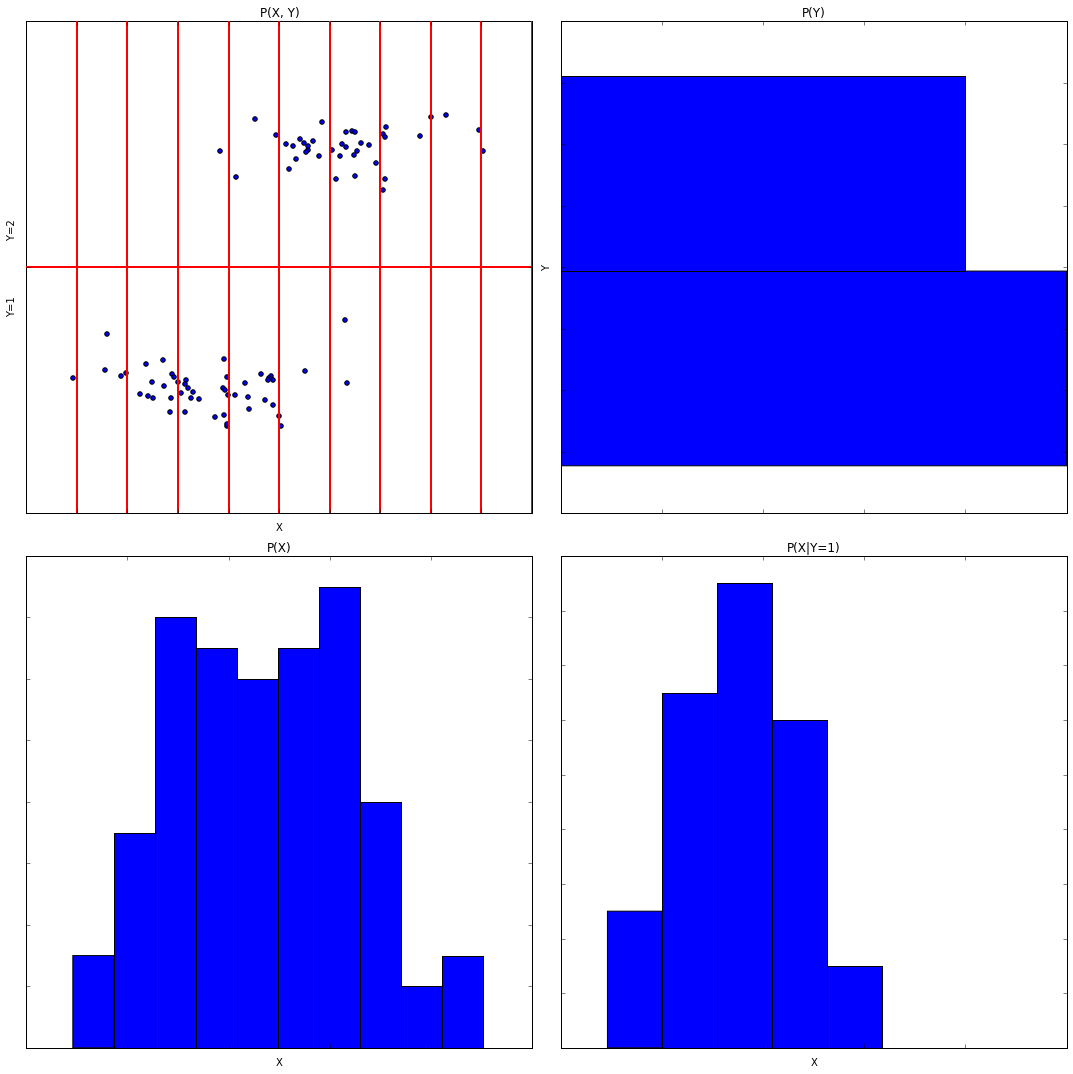

In [17]:
np.random.seed(2)

#generate some random data
X = np.zeros((90, 2))
X[:40,0] = np.random.normal(loc = 6.5, scale = 1.1, size = 40)
X[:40,1] = np.random.normal(1.5, scale = 0.07, size = 40)

X[40:90,0] = np.random.normal(loc = 3.5, scale = 1.1, size = 50)
X[40:90,1] = np.random.normal(0.5, scale = 0.07, size = 50)

fig = plt.figure(figsize=(15, 15))
ax = plt.subplot(221)

#the main plot of the data within the 2 D grid
ax.scatter(X[:,0], X[:,1])
ax.set_title("P(X, Y)")
ax.set_xlabel("X")
ax.set_ylabel("Y=1                  Y=2")
ax.set_xlim(0,10)
ax.set_ylim(0,2)
ax.grid(b=True, linewidth = 2, which='major', linestyle='-', color='red')
ax.xaxis.set_ticks([1,2,3,4,5,6,7,8,9,10])
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.yaxis.set_ticks([1])


#now plot the 3 histograms
ax = plt.subplot(222)

#this is the rotated P(Y) histogram
ax.hist(X[:,1], bins = 2, orientation='horizontal')
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.set_title("P(Y)")
ax.set_ylabel("Y")

ax = plt.subplot(223)

#this is the P(X) histogram
ax.set_xlim(0, 10)
ax.hist(X[:, 0], bins=10)
ax.set_title("P(X)")
ax.set_xlabel("X")
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])

ax = plt.subplot(224)

#this is one of the 2 P(X|Y) histograms, which is placed on the diagonal
ax.set_title("P(X|Y=1)")
ax.set_xlabel("X")
ax.set_xlim(0,10)
ax.hist(X[40:90,0], bins = 5)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])

plt.tight_layout()

---
NAIVE BAYES CLASSIFIER
=====
***

$P(C_{k}|\vec{x}) \text{ where } x = (x_{1}, x_{2}, ..., x_{N})$

- using Bayes:

$P(C_{k}|\vec{x}) = \frac{P(\vec{x}|C_{k}) \times P(C_{k})}{P(\vec{x})}$

- because we will be comparing 2 probabilities (for at least a 2 class problem) we can ignore the denominator. 

- The relatively magnitude of $P(C_{k}|\vec{x})$ will be the same whether or not we divide by $P(\vec{x})$

$\text{Let }N=3$

$P(C_{k}|\vec{x}) = P(C_{k}|x_{1}, x_{2}, x_{3}) $

- expand using Bayes and forget the denominator

$=  P(x_{1}, x_{2}, x_{3}|C_{k})  \times p(C_{k})$

- Now use the product rule to expand out the first term

##$ = P(x_{1}|C_{k}) \times P(x_{2}, x_{3}|C_{k}, x_{1})  \times p(C_{k})$

##$ = P(x_{2}|C_{k}, x_{1})  \times P(x_{3}|C_{k}, x_{1}, x_{2}) \times P(x_{1}|C_{k}) \times p(C_{k})$

If $x_{1}, x_{2}, \text{ and } x_{3}$ are independent then 

$P(x_{2}|C_{k}, x_{1}) = P(x_{2}|C_{k})$ and 

$P(x_{3}|C_{k}, x_{1}, x_{2}) = P(x_{3}|C_{k})$

$P(C_{k}|\vec{x}) = P(C_{k}, x_{1}, x_{2}, x_{3})$

$ = P(C_{k}) \times P(x_{1}|C_{k}) \times P(x_{2}|C_{k}) \times P(x_{3}|C_{k})$

Naive Bayes Classifier
=====
***
##$$\hat{y} = \text{argmax}_{k \in {1, ..., K}} \text{  } P(C_{k}) \prod^{N}_{i=1}P(x_{i}|C_{k})$$
---